#  Iris datase

The Iris flower data set or Fisher's Iris data set is a multivariate data set. The data set consists of 150 samples from each of three species of Iris (Iris setosa-0, Iris virginica-1 and Iris versicolor-2). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other

* Goal:Classify a new flower as belonging to one of the 3 classes present in the data set.

_Importing libraries_


In [23]:
import pandas 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
#read file csv
data = pandas.read_csv("iris1.txt", sep=",")

In [3]:
#show top 5 dataframe
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#show last 5 dataframe
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#dataframe lenght
len(data)

150

In [6]:
#show summary information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#show description
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#print name of the columns
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

Visualising the sepal and petal dimensions


NumExpr defaulting to 8 threads.


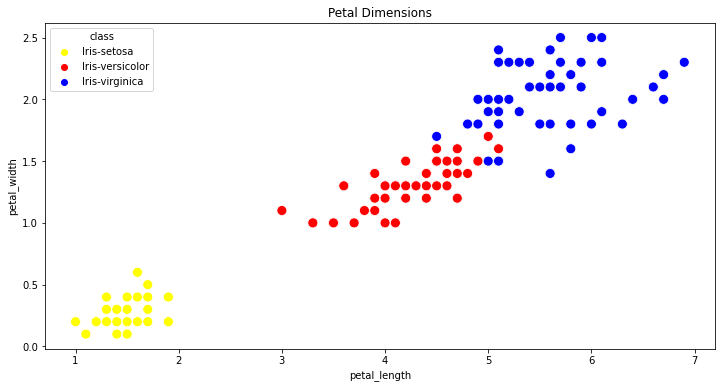

In [27]:
plt.figure(figsize=(12, 6))
plt.title('Petal Dimensions')

sns.scatterplot(x=data["petal_length"], 
                y=data["petal_width"], 
                hue=data["class"],palette = ["yellow","red","blue"],
                s=100);

In [31]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [33]:
#assigning labels and features
train_data=pandas.read_csv("iris1.txt",header=0)
x_train=train_data.values[:,0:4];
y_train=train_data.values[:,4];

In [34]:
#applying DecisionTree 
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train);
y_pred = clf.predict(x_train)

In [35]:
#prin accuracy
print('Training accuracy of classifier is ',metrics.accuracy_score(y_train,clf.predict(x_train)))


Training accuracy of classifier is  1.0


In [36]:
#cross validation
score = cross_val_score(clf,x_train, y_train, cv=5)
score

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

In [37]:
#compute TPR
recallScore = recall_score(y_train, y_pred, average='micro')
recallScore

1.0

In [38]:
f1Score = f1_score(y_train, y_pred, average='micro')
f1Score

1.0

In [39]:
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

In [40]:
clf = clf.fit(iris.data , iris.target)


In [41]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
#print depth of tree
print('Depth of learnt tree is ',clf.tree_.max_depth)

Depth of learnt tree is  5


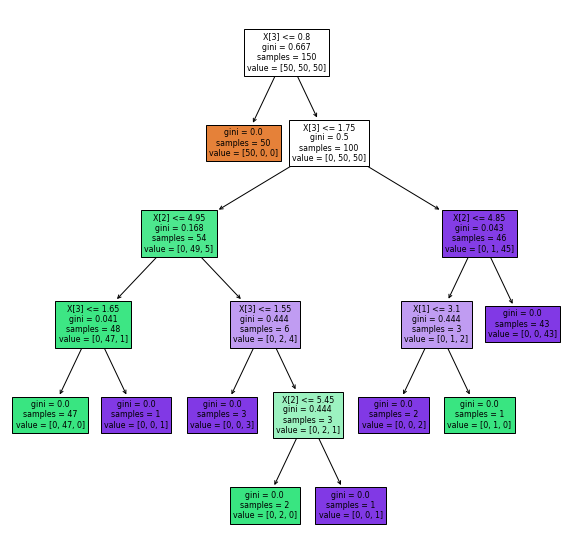

In [43]:
plt.figure(figsize = [10,10])
tree.plot_tree(clf,filled=True)
plt.show()

In [44]:
print(tree.export_text(clf))

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2

